# Muhammad Rafif - 2440057741 - No 2

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [73]:
data = pd.read_csv("clickbait.csv")
data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [74]:
text = data['headline'].values
labels = data['clickbait'].values
text_train, text_test, y_train, y_test = train_test_split(text, labels)
print(text_train.shape, text_test.shape, y_train.shape, y_test.shape)

(24000,) (8000,) (24000,) (8000,)


The preprocessing process carried out in the code is common in Natural Language Processing (NLP) and includes the following steps:

Tokenization: This step involves converting the text data into a numerical representation, where each unique word in the text is assigned an integer. The Tokenizer class from the keras.preprocessing.text module is used to perform this step. The fit_on_texts method is used to fit the tokenizer on the text data and build the vocabulary, which is a mapping of words to integers.

Sequence encoding: In this step, each text is converted into a sequence of integers using the texts_to_sequences method. The resulting sequences represent the text data in a numerical form that can be processed by a machine learning model.

Padding: In NLP, the length of the text sequences can vary greatly, so it's common to pad the sequences to a fixed length. This step is performed using the pad_sequences function from the keras.preprocessing.sequence module. The maxlen argument is used to specify the maximum length of each sequence, and any sequences that are shorter than maxlen are padded with zeros to reach this length.


The code below is preprocessing text data for use in a machine learning model. The vocab_size variable defines the maximum number of words to keep in the vocabulary of the tokenizer. The maxlen variable determines the maximum length of each sequence (i.e. the length of each input vector) to be used as input to the model. The embedding_size variable defines the size of the vector representation of each word.

The Tokenizer class from the keras.preprocessing.text module is instantiated with vocab_size as the maximum number of words to keep in the vocabulary. The fit_on_texts method is then called on text to build the vocabulary from the text data.

The texts_to_sequences method is used to convert each text in text_train and text_test to a sequence of integers, where each integer corresponds to a word in the vocabulary. The sequences are then padded using the pad_sequences function from the keras.preprocessing.sequence module to ensure that all sequences have the same length of maxlen.


In [75]:
vocab_size = 5000
maxlen = 500
embedding_size = 32

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)

X_train = tokenizer.texts_to_sequences(text_train)
x_test = tokenizer.texts_to_sequences(text_test)

X_train = pad_sequences(X_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

The code below is defining a sequential model in Keras for text classification.

The model starts with an Embedding layer, which takes the integer-encoded sequences generated in the preprocessing step and converts them into dense vectors of size embedding_size. This layer is then followed by an LSTM (Long Short-Term Memory) layer with 32 units. The return_sequences argument is set to True which means that the LSTM layer will output a sequence, rather than just a single vector.

The GlobalMaxPooling1D layer is then used to perform global max pooling on the output of the LSTM layer. This reduces the output of the LSTM layer to a single vector per sequence, representing the maximum activation across the entire sequence. The Dropout layer with a rate of 0.2 is then added to prevent overfitting.

Finally, a Dense layer with a single unit and a sigmoid activation function is added to produce a binary classification output.

The model.summary() method is used to print a summary of the model architecture, including the shapes of the input and output tensors, the number of parameters, and the activation functions used.


In [76]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 500, 32)           8320      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
________________________________________________

The code below defines two callbacks for training a machine learning model in Keras. The callbacks are lists of functions that can be passed to the fit method of the model to modify its behavior during training.

EarlyStopping: The EarlyStopping callback is used to stop the training process early if the validation accuracy (val_accuracy) has not improved for a certain number of epochs. The min_delta argument specifies the minimum change in the monitored quantity to qualify as an improvement, patience is the number of epochs with no improvement after which training will be stopped, and verbose controls the verbosity of the output.

ModelCheckpoint: The ModelCheckpoint callback is used to save the best weights of the model based on the validation accuracy. The filepath argument specifies the path to the file where the weights will be saved, monitor is the quantity to be monitored, mode is set to max which means that the weights will be saved only when the monitored quantity is maximum, save_best_only argument is set to True which means that only the best weights will be saved and save_weights_only is set to True which means that only the weights will be saved and not the entire model. The verbose argument controls the verbosity of the output.


In [77]:
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=3,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='weights.h5',
        monitor='val_accuracy', 
        mode='max', 
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )
]

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=512, validation_data=(x_test, y_test), epochs=20, callbacks=callbacks)

Epoch 1/20
47/47 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.7420 
Epoch 1: val_accuracy improved from -inf to 0.95025, saving model to weights.h5
47/47 [==============================] - 696s 14s/step - loss: 0.6651 - accuracy: 0.7420 - val_loss: 0.5478 - val_accuracy: 0.9503
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 0.3995 - accuracy: 0.9547
Epoch 2: val_accuracy improved from 0.95025 to 0.95800, saving model to weights.h5
47/47 [==============================] - 463s 10s/step - loss: 0.3995 - accuracy: 0.9547 - val_loss: 0.2436 - val_accuracy: 0.9580
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 0.2586 - accuracy: 0.9122
Epoch 3: val_accuracy did not improve from 0.95800
47/47 [==============================] - 464s 10s/step - loss: 0.2586 - accuracy: 0.9122 - val_loss: 0.2540 - val_accuracy: 0.9467
Epoch 4/20
47/47 [==============================] - ETA: 0s - loss: 0.1866 - accuracy: 0.9752 
Epoch 4: val_ac

In [79]:
model.load_weights('weights.h5')
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


The code below is used to visualize the accuracy and loss curves during training and validation of a machine learning model. The history object is a record of the loss and accuracy values during training, which can be obtained by passing the history argument to the fit method of the model.

The acc and val_acc variables store the training and validation accuracy values respectively, while loss and val_loss store the training and validation loss values respectively. The x variable stores the range of epochs for which the values were recorded.

The plt.figure function creates a figure with the specified figsize and the subplot function is used to divide the figure into two subplots, one for the accuracy curves and one for the loss curves.

The plt.plot function is used to plot the training and validation accuracy/loss values against the range of epochs stored in the x variable. The label argument is used to specify the label for each curve, which is used by the plt.legend function to create a legend for the plot. The plt.title function is used to specify the title for each subplot.

Finally, the plt.show function is used to display the plot.



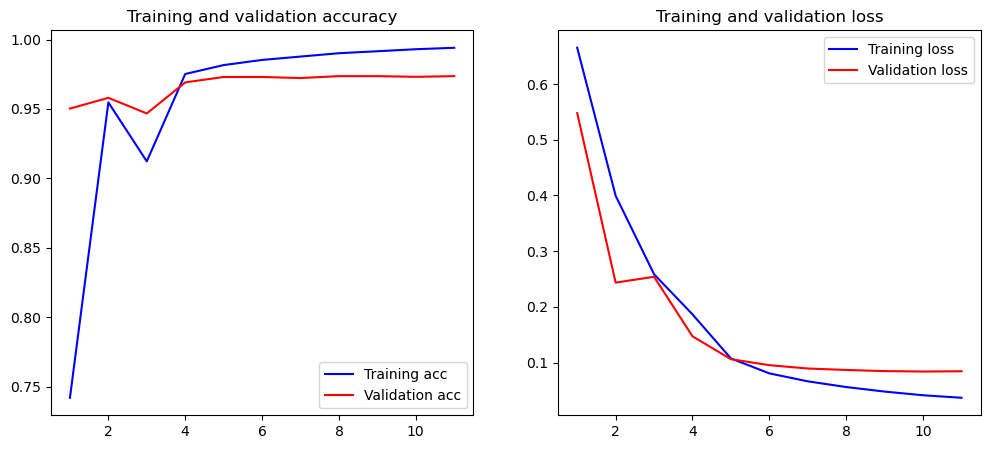

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The code below is used to evaluate the performance of the machine learning model. The model.predict method is used to make predictions on the test set and the resulting predictions are rounded to the nearest integer (0 or 1) and stored in the preds list.

The confusion_matrix function is then used to calculate the confusion matrix from the true labels y_test and the predicted labels preds. The plot_confusion_matrix function is used to visualize the confusion matrix. The hide_ticks argument is used to hide the axis ticks, the cmap argument is used to specify the color map, and the figsize argument is used to specify the size of the plot.

The xticks and yticks functions are used to set the labels for the x-axis and y-axis respectively. The plt.show function is used to display the plot.


250/250 [==============================] - 22s 89ms/step


<Figure size 640x480 with 0 Axes>

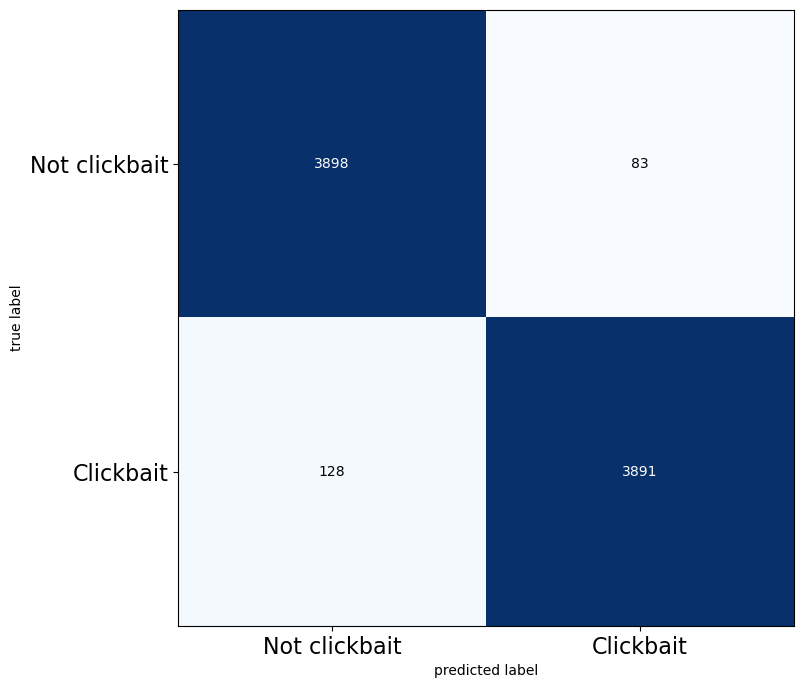

In [81]:
preds = [round(i[0]) for i in model.predict(x_test)]
cm = confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.yticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.show()

Next, the true positive (tp), false positive (fp), false negative (fn), and true negative (tn) values are extracted from the confusion matrix. Precision is calculated as tp / (tp + fp), while recall is calculated as tp / (tp + fn). The precision and recall values are then printed with a formatted string.

In [82]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.97
Precision of the model is 0.98


In [83]:
test = ['My biggest laugh reveal ever!', 'Learning game development with Unity', 'A tour of Japan\'s Kansai region', '12 things NOT to do in Europe']
token_text = pad_sequences(tokenizer.texts_to_sequences(test), maxlen=maxlen)
preds = [round(i[0]) for i in model.predict(token_text)]
for (text, pred) in zip(test, preds):
    label = 'Clickbait' if pred == 1.0 else 'Not Clickbait'
    print("{} - {}".format(text, label))

1/1 [==============================] - 0s 289ms/step
My biggest laugh reveal ever! - Clickbait
Learning game development with Unity - Not Clickbait
A tour of Japan's Kansai region - Not Clickbait
12 things NOT to do in Europe - Clickbait


# Using Pre-trained Model = BERT

In [85]:
train_df,remaining = train_test_split(data,random_state=42,train_size=0.0075,stratify=data.clickbait.values)
valid_df,_ = train_test_split(remaining,random_state=42,train_size=0.00075,stratify=remaining.clickbait.values)
train_df.shape,valid_df.shape

((240, 2), (23, 2))

In [53]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [86]:
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [87]:
  train_data = tf.data.Dataset.from_tensor_slices((train_df.headline.values, train_df.clickbait.values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.headline.values, valid_df.clickbait.values))

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'Jaimie Alexander Was The Best Part Of The Golden Globes', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)


The code sets up the BERT layer and tokenizer to be used in the model. The BERT layer is loaded from the TensorFlow Hub repository, which contains pre-trained models ready to use in Keras. The vocab_file and do_lower_case parameters are resolved from the BERT layer and used to instantiate the tokenizer. The tokenizer is used to convert text sequences into numerical representations that can be processed by the BERT model. The max_seq_length variable sets the maximum length of the input sequences, and the train_batch_size sets the batch size for training the model.


In [88]:
label_list = [0, 1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

this function to_feature takes a text and a label as input and returns a feature representation of the text. The feature representation is obtained by converting the input text into a format that can be understood by BERT. This is achieved by using the InputExample class of the classifier_data_lib module, which creates a single example of the input data, which can be passed to the function convert_single_example to convert the text into features.

The features returned by this function are the input ids, input masks, segment ids, and label id, which are required by BERT for processing the input data.


In [89]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(), 
                                            text_b = None, 
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)
  
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [90]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], 
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  # py_func doesn't set the shape of the returned tensors.
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  return (x, label_id)

In [91]:
  # train
  train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          #.cache()
                          .shuffle(1000)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE)) 

Now that the datasets are prepared, they can be used to train and evaluate the BERT based model.

This code defines a function create_model that creates a binary sentiment classification model using the BERT pre-trained transformer.

The model takes three inputs: input_word_ids, input_mask, and input_type_ids. These represent the tokenized input sequences, the attention masks for the tokenized input sequences, and the token type ids indicating which tokens belong to the first and second segments of the input.

The model first passes the input data through the bert_layer to obtain a pooled representation and a sequence representation of the input. The pooled_output is then passed through a dropout layer with a rate of 0.4, and then a dense layer with a single output and sigmoid activation. The result represents the predicted probability of the input being positive.

Finally, the model is defined using the Keras Model class, with the three inputs and the output connected to the appropriate layers.


In [92]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

In [93]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                     loss=tf.keras.losses.BinaryCrossentropy(),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 128)]        0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 128, 768)]                'input_mask[0][0]',       

In [94]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi=76)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [95]:
# Train model
epochs=4
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/4
7/7 [==============================] - 409s 56s/step - loss: 1.0897 - accuracy: 0.5491
Epoch 2/4
7/7 [==============================] - 388s 55s/step - loss: 0.8175 - accuracy: 0.5223
Epoch 3/4
7/7 [==============================] - 462s 68s/step - loss: 0.7940 - accuracy: 0.5804
Epoch 4/4
7/7 [==============================] - 386s 54s/step - loss: 0.8508 - accuracy: 0.5045


In [97]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

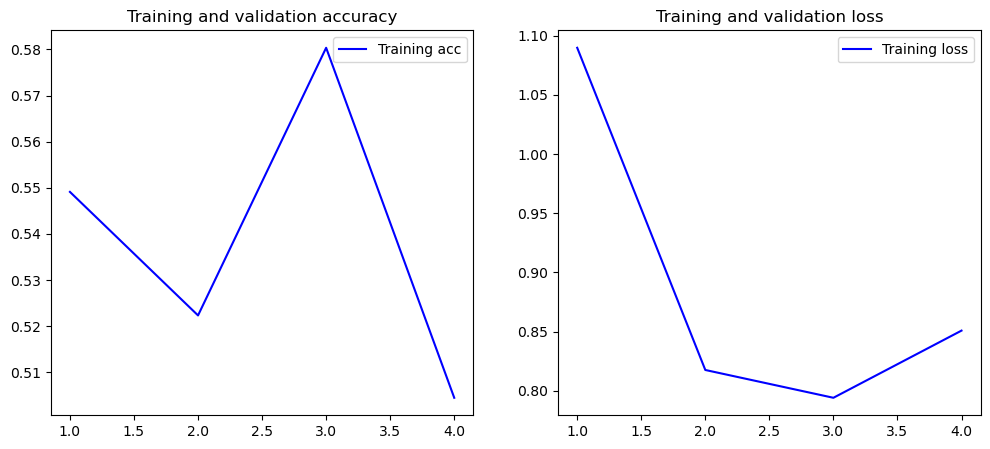

In [98]:
acc = history.history['accuracy']
loss = history.history['loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [104]:
sample_example = ['My biggest laugh reveal ever!', 'Learning game development with Unity', 'A tour of Japan\'s Kansai region', '12 things NOT to do in Europe']
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
['Toxic' if pred >=0.5 else 'not clickbait' for pred in preds]

4/4 [==============================] - 9s 2s/step


['not clickbait', 'not clickbait', 'not clickbait', 'not clickbait']

In [103]:
preds

array([[0.4795853 ],
       [0.47958547],
       [0.47958535],
       [0.47958538]], dtype=float32)

**From the results of the two models above, it can be concluded that the model that does not use the pre-trained model has more satisfactory results with an accuracy rate of 98 percent.**